In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [38]:
import requests
from io import BytesIO
from PIL import Image

url = "https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg"
res = requests.get(url)
image = Image.open(BytesIO(res.content))

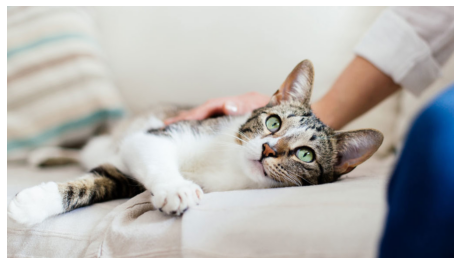

In [40]:
import cv2
import matplotlib.pyplot as plt

# image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

## ImagDataGenerator를 이용하여 Augmentation 적용하기
* ImageDataGenerator는 fit(), flow()를 통해서 입력된 image array(numpy)를 변환 동작시킬 수 있으며, 실제 변환은 next()등으로 iteration 호출해야 함
* ImageDataGenerator가 입력으로 받는 image array는 batch를 포함한 4차원 array임. 즉 [579, 1028, 3] shape인 image array가 입력되면 이를 4차원 형태인 [1, 579, 1028, 3] 으로 변경해야 함.
* 변경된 pixel값은 float이므로 이를 다시 int형으로 변경해서 시각화 필요.

### 좌우, 상하 반전(Horizontal Flip, Vertical Flip)
* horizontal_flip=True로 좌우 반전 적용. 하지만 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정
* vertical_flip=True로 상하 반전 적용. 마찬가지로 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정

image_batch shape: (1, 579, 1028, 3)
aug_image shape: [[[[187. 178. 179.]
   [187. 178. 179.]
   [187. 178. 179.]
   ...
   [194. 205. 201.]
   [193. 204. 200.]
   [192. 203. 199.]]

  [[187. 178. 179.]
   [187. 178. 179.]
   [187. 178. 179.]
   ...
   [195. 204. 201.]
   [194. 205. 201.]
   [193. 204. 200.]]

  [[187. 178. 179.]
   [187. 178. 179.]
   [187. 178. 179.]
   ...
   [197. 206. 203.]
   [196. 205. 202.]
   [194. 205. 201.]]

  ...

  [[  2.   9.  28.]
   [  2.   9.  28.]
   [  2.   9.  28.]
   ...
   [182. 173. 168.]
   [196. 189. 183.]
   [193. 186. 180.]]

  [[  2.   9.  28.]
   [  2.   9.  28.]
   [  2.   9.  28.]
   ...
   [179. 170. 165.]
   [189. 182. 176.]
   [184. 177. 171.]]

  [[  2.   9.  28.]
   [  2.   9.  28.]
   [  2.   9.  28.]
   ...
   [193. 184. 179.]
   [198. 191. 185.]
   [189. 182. 176.]]]]


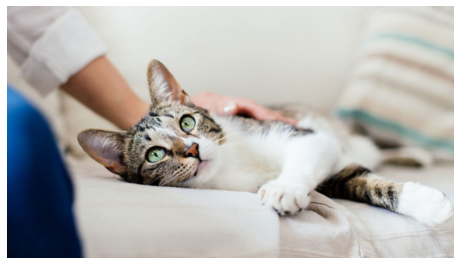

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True)

image_batch = np.expand_dims(image, axis=0)
print('image_batch shape:', image_batch.shape)

# ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

# ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
aug_image_batch = next(data_gen_iter)

# 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
aug_image = np.squeeze(aug_image_batch)
print('aug_image shape:', aug_image_batch)

# 반환된 pixel값은 float임. 이를 다시 int형으로 변경 후, 이미지 시각화 
aug_image = aug_image.astype('int')
show_image(aug_image)

### 여러 이미지의 ImageDataGenerator 변환을 수행하는 함수 생성 
* ImageDataGenerator는 next()로 호출이 될 때마다 Random하게 Augmentation 적용이 설정되어 변환됨. 

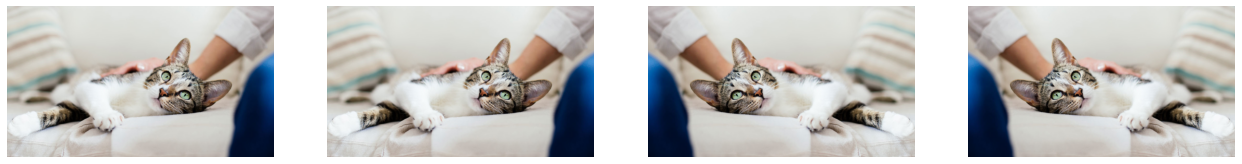

In [43]:
N_IMAGES = 4
fig, axs = plt.subplots(nrows=1, ncols=N_IMAGES, figsize=(22, 8))

for i in range(N_IMAGES):
    aug_image_batch = next(data_gen_iter)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

In [44]:
# ImageDataGenerator 객체를 입력하면 augmentation 적용된 일련의 image들을 시각화 해주는 함수 생성. 
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
    
    image_batch = np.expand_dims(image, axis=0)
    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 8))

    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        if(to_int):
            aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
        axs[i].axis('off')

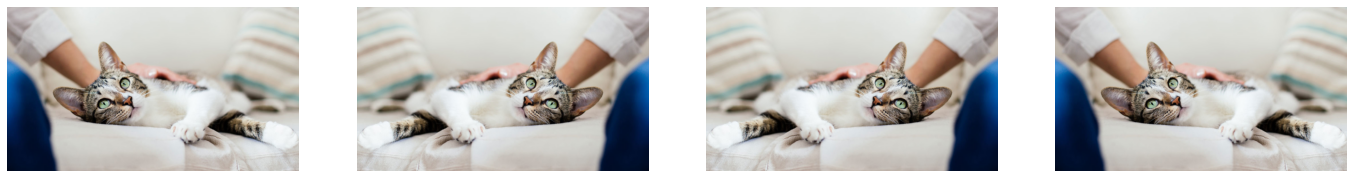

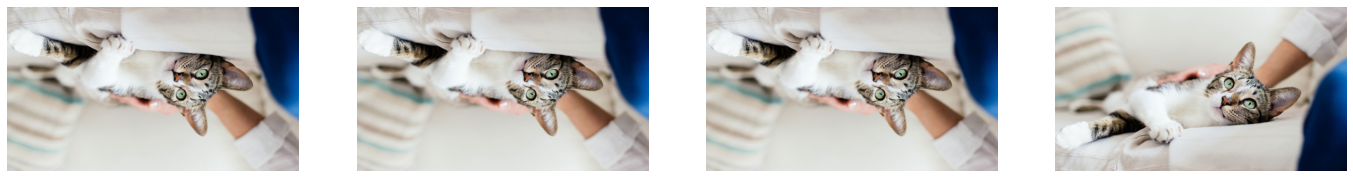

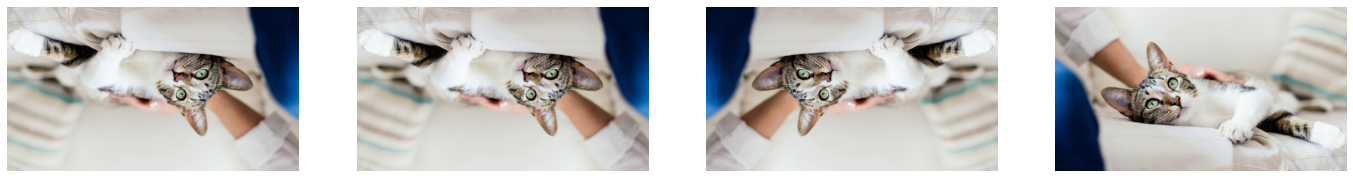

In [46]:
# Horizontal Flip(좌우 반전)을 적용. horizontal_flip=True을 적용했지만 반드시 변환하는 것은 아님. Random하게 원본 데이터를 유지하거나 변환 결정. 
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# Vertical Flip(좌우 반전)을 적용. vertical_flip=True을 적용했지만 반드시 변환하는 것은 아님. Random하게 원본 데이터를 유지하거나 변환 결정. 
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# 두개를 함께 적용. 
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

### 이미지 Rotation(회전) 적용

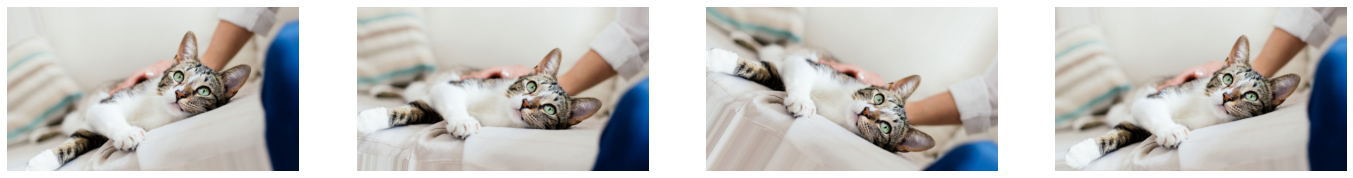

In [49]:
# rotation 범위를 -45 ~ 45도로 설정.         
data_gen = ImageDataGenerator(rotation_range=45)
show_aug_image_batch(image, data_gen, n_images=4)

### 이미지 좌우,상하 이동(Shift)
* width_shift_range, height_shift_range 입력 인자를 통해 좌우, 상하 이동. 
* width_shift_range, height_shift_range 값은 0 ~ 1 사이 값 부여. 수행 시 마다 전체 이미지 대비 해당 범위의 값 비율만큼 Random 하게 이동.
* 이동하게 되면 이동되고 남아있는 공간은 비어있게 되는데 이를 어떻게 채울치는 fill_mode 인자로 결정
* fill_mode는 아래와 같이 설정
* * nearest: 가장 빈공간에 가장 근접한 pixel로 채우기
* * reflect: 빈공간 만큼의 영역을 근처 공간으로 채우되 마치 거울로 반사되는 이미지를 보듯이 채움. 
* * wrap: 빈공간을 이동으로 잘려나간 이미지로 채움
* * constant: 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움. cval=0 이면 검은색 픽셀로 채움

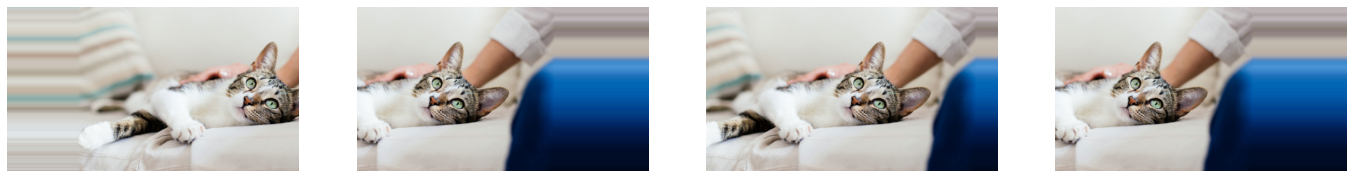

In [51]:
# 왼쪽 또는 오른쪽으로 이미지 이동을 주어진 width_shift_range에 따라 random하게 수행. 
data_generator = ImageDataGenerator(width_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

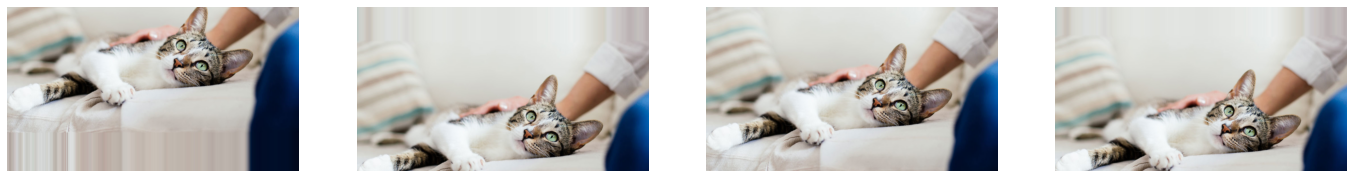

In [52]:
# 위쪽 또는 아래쪽 이미지 이동을 주어진 height_shift_range에 따라 random하게 수행.
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

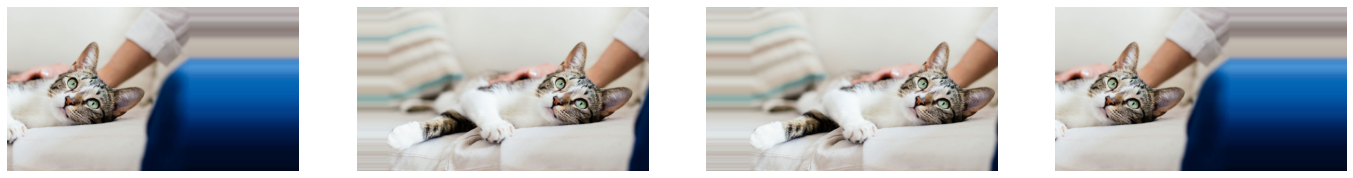

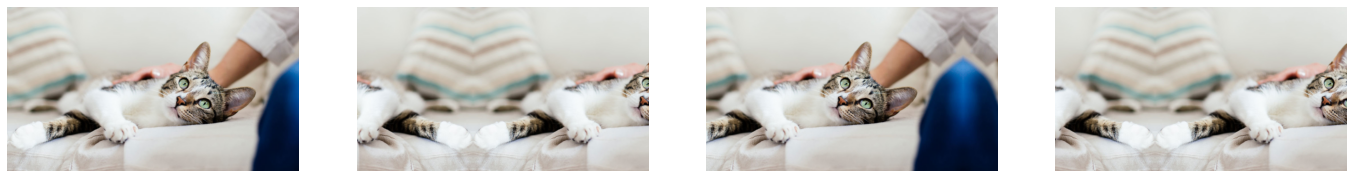

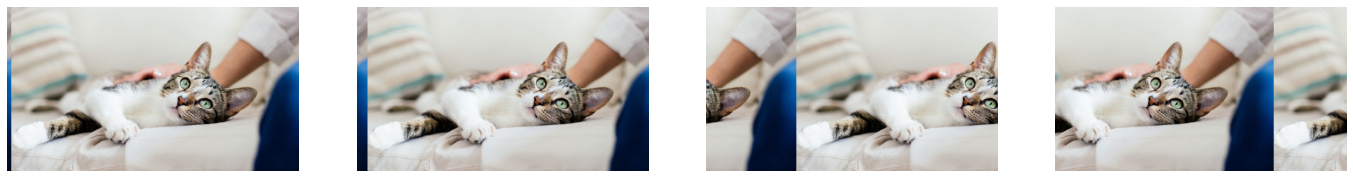

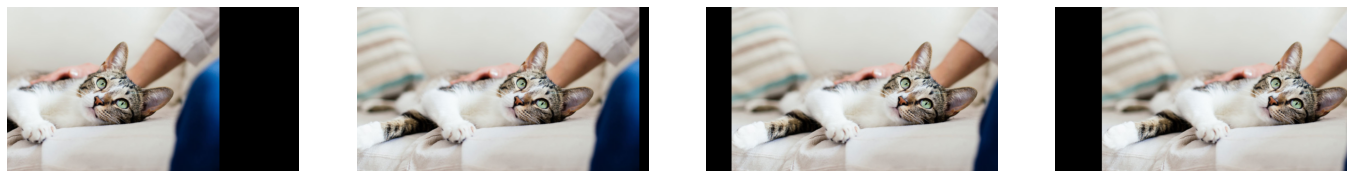

In [53]:
# 빈공간을 가장 가까운 곳의 픽셀값으로 채움. 
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator, n_images=4)

# 빈공간 만큼의 영역을 근처 공간으로 채움. 
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator, n_images=4)

# 빈공간을 이동으로 잘려나간 이미지로 채움
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator, n_images=4)

# 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Zoom(Scale) 적용
* Zoom은 zoom_range을 설정하여 적용. zoom_range가 1보다 작으면 확대(Zoom In), 1보다 크면 축소(Zoom Out)
* 축소 시 빈 공간은 fill_mode에 따라 픽셀을 채움. Default는 nearest 

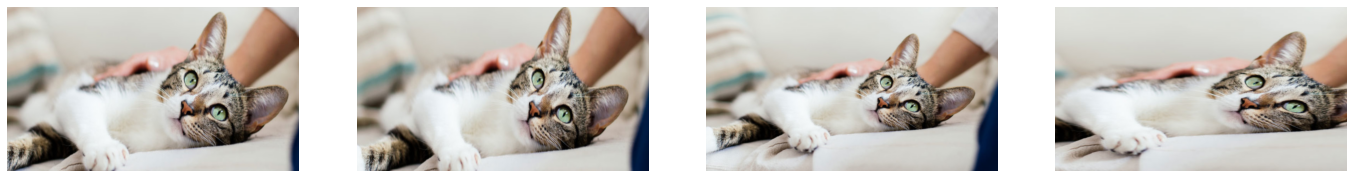

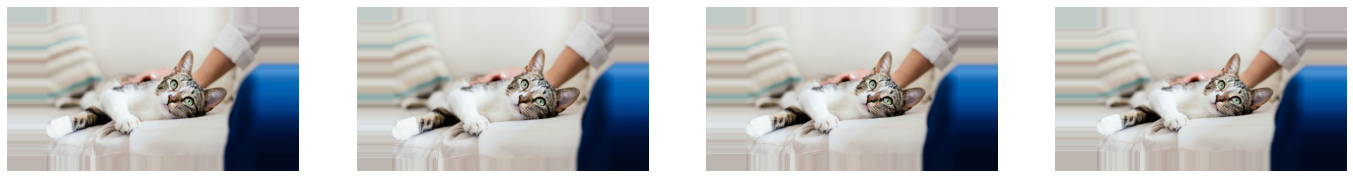

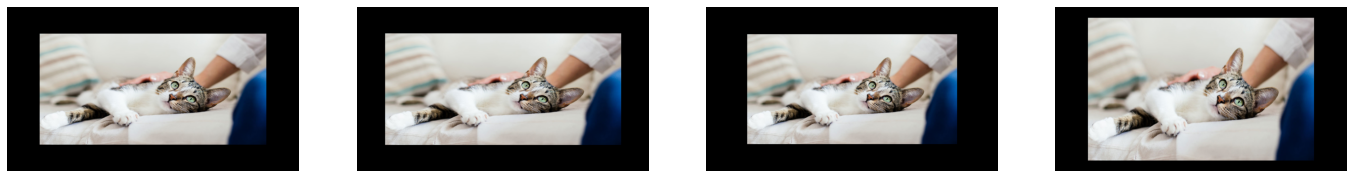

In [54]:
# Zoom In(확대)
data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])
show_aug_image_batch(image, data_generator, n_images=4)

# Zoom out(축소)
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5])
show_aug_image_batch(image, data_generator, n_images=4)

# Zoom out 시 비어 있는 공간 채우기 
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5], fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Shear 적용
shear_range로 이용하여 적용. shear_range=45일 경우 -45 ~ 45 도 사이에서 변환 적용

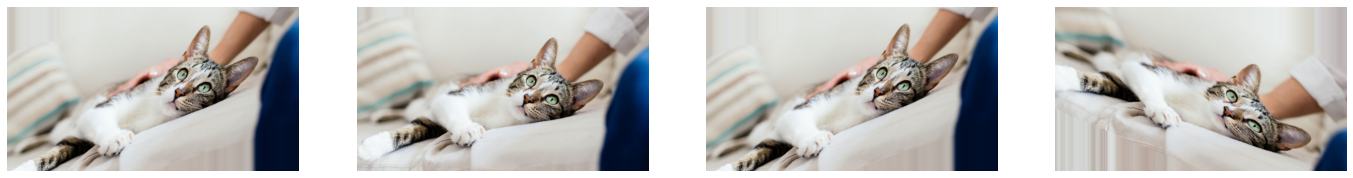

In [55]:
data_generator = ImageDataGenerator(shear_range=45)
show_aug_image_batch(image, data_generator, n_images=4)

### Bright 적용
brightness_range 로 밝기 조절. 0~1 사이 값이 입력 되며, 0에 가까울수록 원본 이미지 보다 더 어둡고, 1보다 커질 수록 원본 이미지 보다 밝음. 

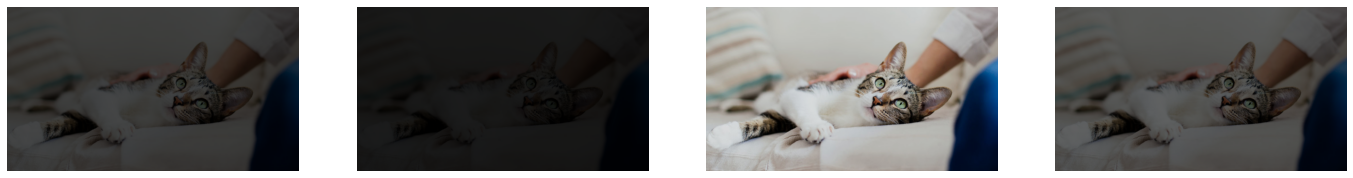

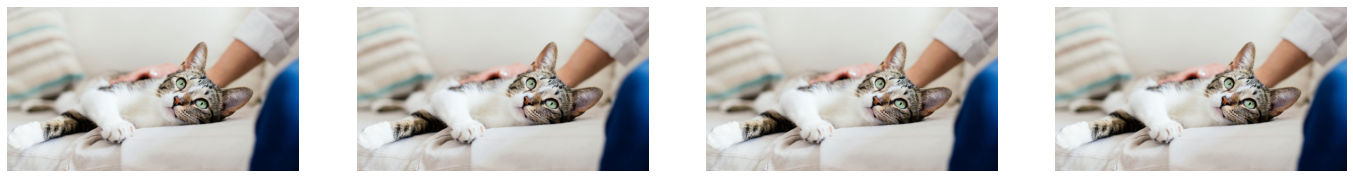

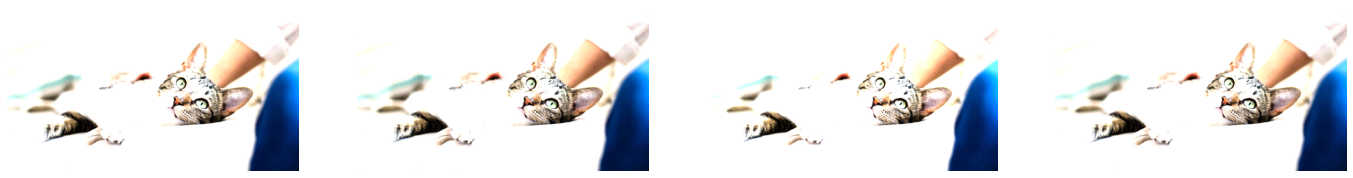

In [60]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
show_aug_image_batch(image, data_generator, n_images=4)
data_generator = ImageDataGenerator(brightness_range=(1.0, 1.0))
show_aug_image_batch(image, data_generator, n_images=4)
data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))
show_aug_image_batch(image, data_generator, n_images=4)
#show_aug_image_batch(image, data_generator, n_images=4)

### Channel Shift
* 원본 이미지의 RGB Pixel값을 channel_shift_range 범위에 있는 임의의 값으로 변환.

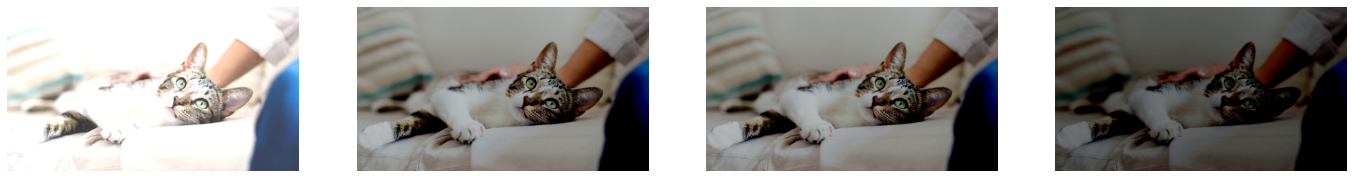

In [59]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
show_aug_image_batch(image, data_generator, n_images=4)

TypeError: 'JpegImageFile' object is not subscriptable

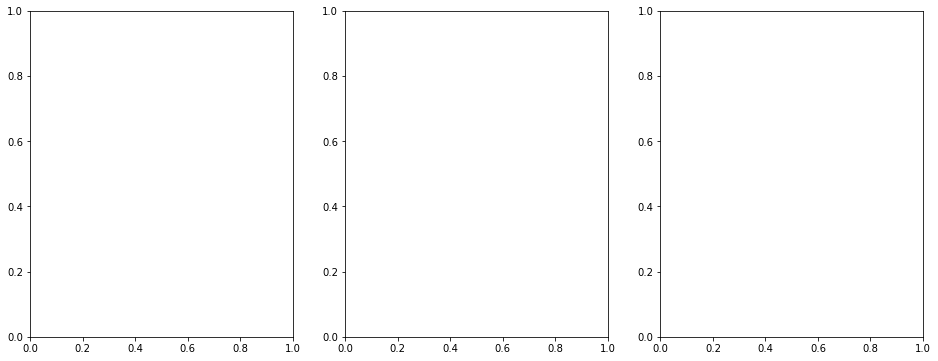

In [62]:
def get_aug_image(image, data_generator):
    # ImageDataGenerator는 여러개의 image를 입력으로 받음. 따라서 3차원이 아니라 batch를 포함한 4차원 array를 입력받음. np.expand_dims()로 차원 증가.
    image_batch = np.expand_dims(image, axis=0)

    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)

    # ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
    aug_image_batch = next(data_gen_iter)

    # 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
    aug_image = np.squeeze(aug_image_batch)

    ### aug_image를 int형으로 변환하지 않고 float으로 그대로 유지.  
    aug_image = aug_image
    
    return aug_image

data_generator = ImageDataGenerator(channel_shift_range=150.0)
aug_image = get_aug_image(image, data_generator)


# RGB 모든 채널에 대해서 원본과 변환 이미지 Pixel값의 Histogram 시각화 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(3):
    # i값 0 일때 Red 채널, i값 1일때 Green Channel, i값 2일때 Blue Channel Histogram 표현 
    axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5, label="original")
    axs[i].hist(aug_image[:, :, i].flatten(), bins=100, alpha=0.5, label="channel shift")
    axs[i].legend(loc='upper right')
    if i==0:
        title_str = 'Red'
    elif i==1:
        title_str = 'Green'
    else: 
        title_str = 'Blue'
    axs[i].set(title=title_str)

### Normalization
* 일반적으로 augmentation 용도가 아닌 CNN 입력 값으로 Pixel값 변환을 위해 0~1사이의 값으로 변환하거나 채널별 Z score변환(평균 0, 표준편차 1) 적용 
* featurewise_center = True이면 R, G, B 각 픽셀값에서 개별 채널들의 평균 픽셀값을 빼서 평균을 0으로 함. 
* featurewise_std_normalization = True이면 R, G, B 각 픽셀값에서 개별 채널들의 표준 편차값으로 나눔. 
* rescale = 255.0 각 픽셀값을 0 ~ 1사이의 값으로 만들기 위해서 보통 255.0 으로 나눔.

In [63]:
r_mean = np.mean(image[:, :, 0])
g_mean = np.mean(image[:, :, 1])
b_mean = np.mean(image[:, :, 2])

r_std = np.std(image[:, :, 0])
g_std = np.std(image[:, :, 1])
b_std = np.std(image[:, :, 2])

print(r_mean, g_mean, b_mean, r_std, g_std, b_std )

r_zscore = (image[:, :, 0] - r_mean)/r_std
g_zscore = (image[:, :, 1] - g_mean)/g_std
b_zscore = (image[:, :, 2] - b_mean)/b_std

#print(r_zscore, g_zscore, b_zscore)

TypeError: 'JpegImageFile' object is not subscriptable